In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px


import warnings
warnings.simplefilter(action='ignore', category=Warning)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/newsarticle/news.article.json


In [2]:
import json

In [6]:
df = pd.read_json(path_or_buf='/kaggle/input/newsarticle/news.article.json')
df.tail()

,articleBody,dateModified,scrapedDate,source,title
37416,Lebanese media are reporting renewed IDF strik...,NaN,{'$date': '2024-03-31T03:10:17.646Z'},https://www.timesofisrael.com/,Lebanese media reports renewed IDF strikes in ...
37417,Amid escalating tensions and concerns over pot...,{'$date': '2024-03-31T03:03:52.000Z'},{'$date': '2024-03-31T03:09:38.331Z'},https://www.deccanchronicle.com/,"US approves additional bombs, warplanes sales ..."
37418,"Haaretz.com, the online English edition of Haa...",{'$date': '2024-03-28T00:00:00.000Z'},{'$date': '2024-03-31T03:09:46.683Z'},https://www.haaretz.com/,Israel Publishes Video of Islamic Jihad Terror...
37419,"The UN secretary general, António Guterres, ha...",{'$date': '2024-03-31T00:00:00.000Z'},{'$date': '2024-03-31T03:09:50.586Z'},https://www.theguardian.com/,United Nations secretary general condemns expl...
37420,Aam Aadmi Party (AAP) leader Raghav Chadha rec...,{'$date': '2024-03-26T16:01:17.000Z'},{'$date': '2024-03-31T03:13:43.646Z'},https://indianexpress.com/,Raghav Chadha stirs a row as he meets this UK ...


In [7]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())

Rows     :  37421
Columns  :  5

Features : 
 ['articleBody', 'dateModified', 'scrapedDate', 'source', 'title']

Missing values :   13271


In [8]:


with open('/kaggle/input/newsarticle/news.article.json', 'r') as file:
    articles = json.load(file)

articleBody = [article.get('articleBody', None) for article in articles]
dateModified = [article.get('dateModified', None) for article in articles]
scrapedDate = [article.get('scrapedDate', None) for article in articles]
source = [article.get('source', None) for article in articles]
title = [article.get('title', None) for article in articles]


df = pd.DataFrame({
    'ArticleBody': articleBody,
    'DateModified': dateModified,
    'ScrapedDate': scrapedDate,
    'Source': source,
    'Title': title
})

print(df.head())

                                         ArticleBody  \
0  Sanjay Raut, a member of the Shiv Sena (UBT) p...   
1  Kozhikode (Kerala) [India], October 27 (ANI): ...   
2  Mumbai, Oct 24 (PTI) Maharashtra Chief Ministe...   
3  Sensex, Nifty rebound over 1 pc after six sess...   
4  October 26, 2023 08:15 pm | Updated 08:38 pm I...   

                            DateModified  \
0  {'$date': '2023-10-25T06:35:50.000Z'}   
1                                   None   
2  {'$date': '2023-10-25T02:14:27.000Z'}   
3                                   None   
4  {'$date': '2023-10-26T14:45:24.000Z'}   

                             ScrapedDate                             Source  \
0  {'$date': '2023-10-27T13:12:18.339Z'}      https://www.thehansindia.com/   
1  {'$date': '2023-10-27T13:12:45.595Z'}            https://www.aninews.in/   
2  {'$date': '2023-10-27T13:12:18.339Z'}            https://thefederal.com/   
3  {'$date': '2023-10-27T13:12:41.618Z'}  https://english.varthabharati.in/   
4  

In [13]:
import spacy
from tqdm import tqdm
nlp= spacy.load('en_core_web_lg')
sent_vecs={}
docs=[]
for title in tqdm(df.Title):
    doc= nlp(title)
    docs.append(doc)
    sent_vecs.update({title: doc.vector})
sentences= list(sent_vecs.keys())
vectors= list(sent_vecs.values())

100%|██████████| 37421/37421 [05:14<00:00, 118.93it/s]


In [14]:
for sent, vec in list(sent_vecs.items())[:5]:
    print(f"Title: {sent}\nVector: {vec}\n")

Title: Shiv Sena MP Sanjay Raut Responds To 'Hamas' Remark In Fiery Exchange
Vector: [ 4.06419337e-01  6.60593450e-01  1.89651620e+00 -1.85392964e+00
  2.87645149e+00 -2.56565404e+00  6.82047784e-01 -3.57134700e+00
  6.32708427e-03 -1.68030572e+00 -1.24845791e+00  2.50371527e-02
 -1.15845811e+00  1.61273003e+00 -4.37262863e-01  1.96150970e+00
 -6.55937493e-01 -1.14559150e+00  2.00587675e-01  2.58024740e+00
 -2.28731132e+00 -1.91274196e-01 -1.38889313e-01  2.12943349e-02
  1.65574658e+00  6.34302914e-01  4.55127984e-01  1.84821379e+00
 -2.90556341e-01 -7.88770914e-02  1.18335342e+00  1.24759793e+00
  5.01572192e-01  1.97117007e+00 -1.80905795e+00 -1.28949359e-01
 -6.65521145e-01 -1.23614144e+00 -2.22306728e+00 -1.89655495e+00
  7.47887194e-01 -3.19590002e-01 -4.00626481e-01  1.63259315e+00
 -3.04730105e+00  4.90129322e-01 -1.06907070e+00 -1.91343334e-02
 -1.70004690e+00  1.86709499e+00 -6.75457895e-01 -1.57859004e+00
  2.33688164e+00 -1.33988369e+00 -1.77589285e+00  3.64437280e-03
 -2.0

In [17]:

from sklearn.cluster import DBSCAN
x=np.array(vectors)
n_classes={}
for i in tqdm(np.arange(0.001, 1, 0.002)):
    dbscan= DBSCAN(eps=i, min_samples=2, metric='cosine').fit(x)
    n_classes.update({i: len(pd.Series(dbscan.labels_).value_counts())})
dbscan= DBSCAN(eps=0.08, min_samples=2, metric='cosine').fit(x)

100%|██████████| 500/500 [2:25:29<00:00, 17.46s/it]  


In [18]:
print(pd.Series(dbscan.labels_).value_counts())

-1       22064
 5        4766
 16         73
 50         46
 202        27
         ...  
 762         2
 760         2
 759         2
 757         2
 1875        2
Name: count, Length: 1877, dtype: int64


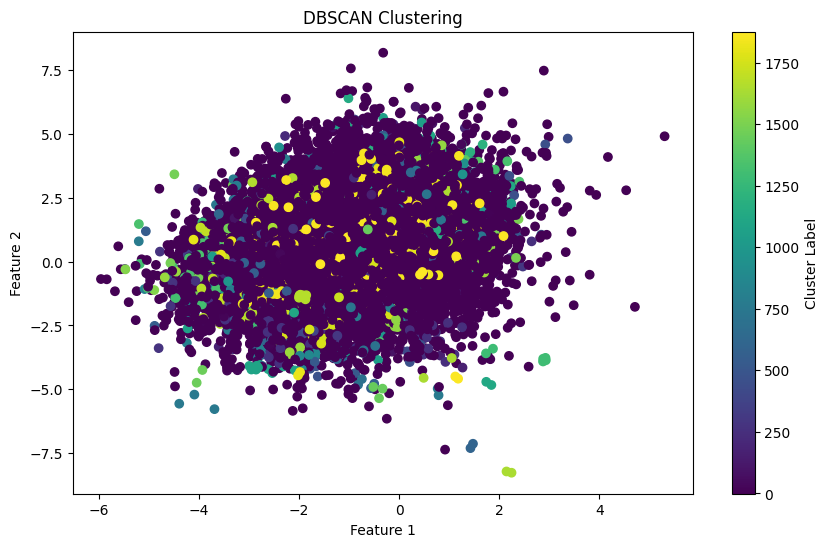

In [23]:


plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=dbscan.labels_, cmap='viridis')
plt.colorbar(label='Cluster Label')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [28]:
# Assuming 'df' is your DataFrame
column_names = df.columns.tolist()
print("Column Names:")
for name in column_names:
    print(name)

Column Names:
ArticleBody
DateModified
ScrapedDate
Source
Title


In [29]:

grouped = results.groupby('label')

for label, group in grouped:
    print(f"Cluster {label}:")
    sentences = group['sent'].tolist()
    dates = df.loc[df['Title'].isin(sentences), 'DateModified'].tolist()
    
    for sentence, date in zip(sentences, dates):
        print(f"- {sentence} ({date})")
    print()  

Cluster -1:
- Shiv Sena MP Sanjay Raut Responds To 'Hamas' Remark In Fiery Exchange ({'$date': '2023-10-25T06:35:50.000Z'})
- Uddhav buried Bal Thackeray's 'Hindutva' for power; may hug Hamas one day: Shinde ({'$date': '2023-10-25T02:14:27.000Z'})
- New Bills replacing IPC, CrPC, Evidence Act will be passed soon: Union Home Minister Amit Shah (None)
- Israel biggest terrorist nation in the world, says Sadikali Thangal ({'$date': '2023-10-26T14:45:24.000Z'})
- Eight Ex-Indian Navy Officers Get Death Penalty In Qatar; India To Challenge Verdict ({'$date': '2023-10-26T11:22:00.000Z'})
- Israel’s response to Hamas terrorist attack disproportionate, says Shashi Tharoor ({'$date': '2023-10-26T13:51:52.000Z'})
- Evening briefing: World's most toxic air in Delhi; toll in B'desh train accident rises to 15; and all the latest news ({'$date': '2023-10-23T13:14:29.000Z'})
- News18 Afternoon Digest: No 2nd Marriage for Assam Govt Workers from Now And Other Top Stories ({'$date': '2023-10-27T07:16:1

In [47]:

def article_contains_keywords(article):
    keywords = ['israel', 'hamas', 'war']  
    
    return any(keyword in article for keyword in keywords)


if len(dbscan.labels_) != len(sentences):
    print("Lengths of dbscan.labels_ and sentences are different!")
    
    sentences = [get_sentence(article) for article in articles if article_contains_keywords(article)]
    
    if len(dbscan.labels_) != len(sentences):
        print("After adjustment, lengths are still different!")
else:
    
    results = pd.DataFrame({'label': dbscan.labels_, 'sent': sentences})
    example_result = results[results.label == 59].sent.tolist()
    event_df = df[df.title.isin(example_result)][['DateModified', 'Title']]
    event_df['DateModified'] = pd.to_datetime(event_df['DateModified'])
    event_df = event_df.sort_values(by='DateModified').dropna()


Lengths of dbscan.labels_ and sentences are different!
After adjustment, lengths are still different!


In [48]:
results=pd.DataFrame({'label':dbscan.labels_,'sent':sentences})
example_result=results[results.label==59].sent.tolist()
event_df=df[df.Title.isin(example_result)][['DateModified','Title']]
event_df['DateModified']=pd.to_datetime(event_df.date)
event_df=event_df.sort_values(by='DateModified').dropna()

ValueError: All arrays must be of the same length

In [44]:
def get_mean_vector(sents):
    a=np.zeros(300)
    for sent in sents:
        a=a+nlp(sent).vector
    return a/len(sents)
def get_central_vector(sents):
    vecs=[]
    for sent in sents:
        doc=nlp(title)
        vecs.append(doc.vector)
    mean_vec = get_mean_vector(sents)
    index= pairwise_distances_argmin_min(np.array([mean_vec]),vecs)[0][0]
    return sents[index]

In [46]:


# Create a table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Date', 'Output']),
    cells=dict(values=[event_df['DateModified'], event_df['Title']])
)])

# Update layout
fig.update_layout(title='Output Table')
fig.show()

In [53]:

from datetime import datetime


def contains_keywords(sentence, keywords):
    return any(keyword.lower() in sentence.lower() for keyword in keywords)


keywords = ['Israel', 'Hamas', 'war']


filtered_sentences = []
filtered_dates = []

for label in set(dbscan.labels_):
    cluster_sentences = results[results.label == label].sent.tolist()
    cluster_dates = df[df.Title.isin(cluster_sentences)]['DateModified'].tolist()
    
    for sentence, date in zip(cluster_sentences, cluster_dates):
        if contains_keywords(sentence, keywords):
            filtered_sentences.append(sentence)
            filtered_dates.append(date)


def extract_date(date):
    if isinstance(date, dict):
        if '$date' in date:
            return date['$date']
    return date

filtered_dates = [extract_date(date) for date in filtered_dates]


filtered_df = pd.DataFrame({
    'Date': filtered_dates,
    'Event': filtered_sentences
})


print("Sample of filtered dates:", filtered_df['Date'].head())
print("Sample of filtered events:", filtered_df['Event'].head())


filtered_df['Date'] = filtered_df['Date'].astype(str)


filtered_df['Date'] = pd.to_datetime(filtered_df['Date'], errors='coerce')


filtered_df = filtered_df.sort_values(by='Date').dropna()


fig = go.Figure(data=[go.Table(
    header=dict(values=['Date', 'Event']),
    cells=dict(values=[filtered_df['Date'].dt.strftime('%Y-%m-%d'), filtered_df['Event']])
)])


fig.update_layout(title='Filtered Events with Dates')
fig.show()

Sample of filtered dates: 0                        None
1                        None
2    2023-12-01T00:00:00.000Z
3    2023-12-01T00:00:00.000Z
4                        None
Name: Date, dtype: object
Sample of filtered events: 0    Sanjay Raut, a member of the Shiv Sena (UBT) p...
1     Hamas and Lashkar-e-Taiba, two terrorist grou...
2     Shinde remarked of this alliance: "For their ...
3     However, he criticized Shinde for focusing on...
4    Kozhikode (Kerala) [India], October 27 (ANI): ...
Name: Event, dtype: object
